<a href="https://colab.research.google.com/github/Ashli41/mnist-classification/blob/main/Ex03_minist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [84]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [85]:
X_train.shape

(60000, 28, 28)

In [86]:
X_test.shape

(10000, 28, 28)

In [87]:
single_image= X_train[0]

In [88]:
single_image.shape

(28, 28)

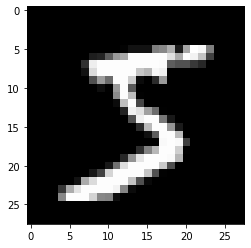

In [89]:
plt.imshow(single_image,cmap='gray')

In [90]:
y_train.shape

(60000,)

In [91]:
X_train.min()

0

In [92]:
X_train.max()

255

In [93]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [94]:
X_train_scaled.min()

0.0

In [95]:
X_train_scaled.max()

1.0

In [96]:
y_train[0]

5

In [97]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [98]:
type(y_train_onehot)

numpy.ndarray

In [99]:
y_train_onehot.shape

(60000, 10)

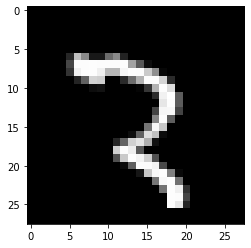

In [100]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [101]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [102]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [103]:
model = keras.Sequential()
from sklearn.metrics.pairwise import polynomial_kernel
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [104]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 32)                173088    
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
________________________________________________

In [105]:
# Choose the appropriate parameters
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [106]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64, 
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 27s 28ms/step - loss: 0.2310 - accuracy: 0.9343 - val_loss: 0.0880 - val_accuracy: 0.9736
Epoch 2/5
938/938 [==============================] - 28s 30ms/step - loss: 0.0791 - accuracy: 0.9772 - val_loss: 0.0582 - val_accuracy: 0.9815
Epoch 3/5
938/938 [==============================] - 28s 29ms/step - loss: 0.0562 - accuracy: 0.9830 - val_loss: 0.0587 - val_accuracy: 0.9805
Epoch 4/5
938/938 [==============================] - 26s 28ms/step - loss: 0.0433 - accuracy: 0.9866 - val_loss: 0.0555 - val_accuracy: 0.9809
Epoch 5/5
938/938 [==============================] - 27s 29ms/step - loss: 0.0359 - accuracy: 0.9890 - val_loss: 0.0520 - val_accuracy: 0.9831


In [107]:
metrics = pd.DataFrame(model.history.history)

In [108]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.231039,0.934333,0.087980,0.9736
1,0.079111,0.977200,0.058187,0.9815
2,0.056180,0.983033,0.058670,0.9805
3,0.043284,0.986567,0.055450,0.9809
4,0.035880,0.989033,0.051973,0.9831


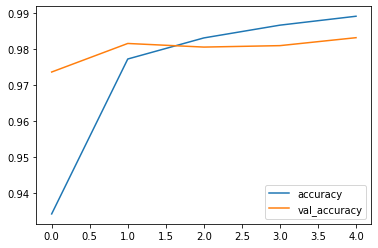

In [109]:
metrics[['accuracy','val_accuracy']].plot()

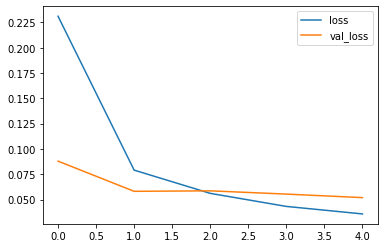

In [110]:
metrics[['loss','val_loss']].plot()

In [111]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

In [112]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 977    0    0    0    0    0    2    1    0    0]
 [   0 1129    2    3    0    0    1    0    0    0]
 [   2    2 1015    1    2    0    0    7    2    1]
 [   0    0    1 1006    0    1    0    1    1    0]
 [   1    2    5    0  950    0    1    0    3   20]
 [   1    0    1   10    0  875    2    0    3    0]
 [   8    3    1    0    1    5  935    0    5    0]
 [   1    3   10    3    0    0    0  999    1   11]
 [   7    0    2    4    0    2    0    3  950    6]
 [   3    3    0    3    1    1    0    3    0  995]]


In [113]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      1.00      0.99      1010
           4       1.00      0.97      0.98       982
           5       0.99      0.98      0.99       892
           6       0.99      0.98      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.96      0.99      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



**Prediction for a single input**



In [126]:
img = image.load_img('ppp.png')

In [115]:
type(img)

PIL.Image.Image

In [127]:
img = image.load_img('ppp.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0


In [117]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

In [118]:
print(x_single_prediction)

[8]


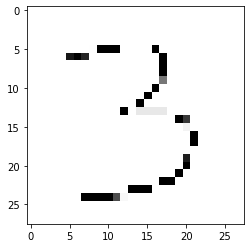

In [128]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [120]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0


In [121]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

In [122]:
print(x_single_prediction)

[3]
